In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model 

In [6]:
#Dataset from 'https://lazyprogrammer.me/course_files/spam.csv' 
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [11]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [12]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [14]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found', V, 'unique tokens.')

Found 7249 unique tokens.


In [15]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [16]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [17]:
D = 20 #embedding dimensionality
M = 15 #hidden state dimensionality

i = Input(shape = (T, ))
x = Embedding(V + 1, D)(i) #V + 1 for all tokens in word index plus unknown(0) 
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [18]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model.fit(
    data_train, Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 14s 27ms/step - loss: 0.4780 - accuracy: 0.8583 - val_loss: 0.3882 - val_accuracy: 0.8673
Epoch 2/10
117/117 [==============================] - 3s 24ms/step - loss: 0.3777 - accuracy: 0.8653 - val_loss: 0.3215 - val_accuracy: 0.8673
Epoch 3/10
117/117 [==============================] - 3s 24ms/step - loss: 0.2628 - accuracy: 0.8653 - val_loss: 0.2064 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 3s 25ms/step - loss: 0.1531 - accuracy: 0.9681 - val_loss: 0.1335 - val_accuracy: 0.9728
Epoch 5/10
117/117 [==============================] - 3s 25ms/step - loss: 0.0903 - accuracy: 0.9896 - val_loss: 0.0963 - val_accuracy: 0.9788
Epoch 6/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0584 - accuracy: 0.9936 - val_loss: 0.0870 - val_accuracy: 0.9772
Epoch 7/10
117/117 [==============================] - 3s 25ms/step - loss: 0.0409 - accuracy: 0.9949 - val_loss: 0.0746 - val_accuracy: 0.981

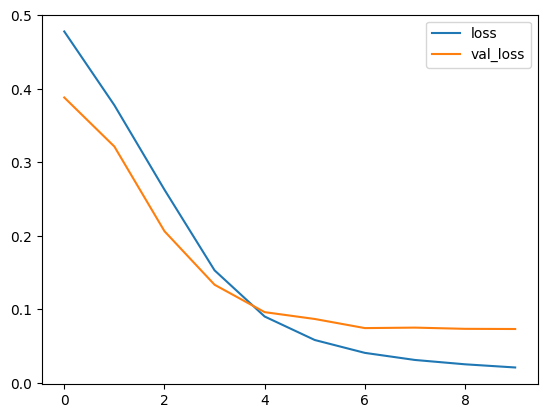

In [19]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

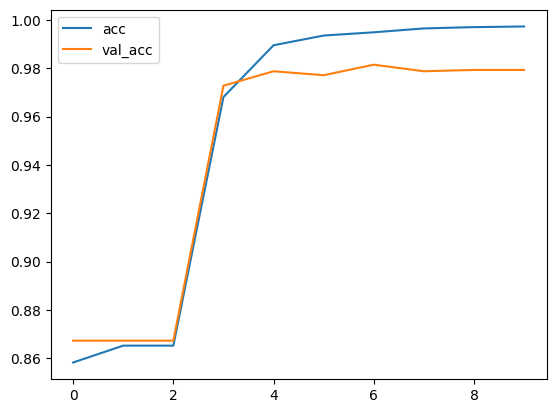

In [20]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()